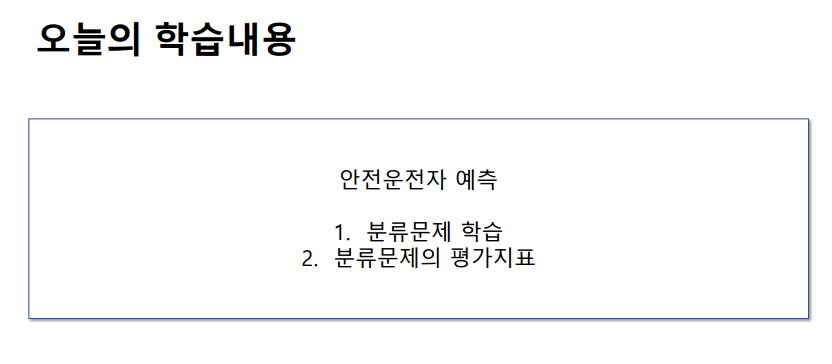

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

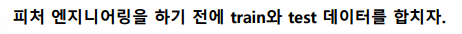

In [3]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('target', axis = 1)

In [4]:
all_features = all_data.columns
all_features

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

In [5]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14', 'id']

In [6]:
remaining_features = [feature for feature in all_features
                      if ('clac' not in feature and
                         'cat' not in feature and
                         feature not in drop_features)]

In [7]:
cat_feature = [feature for feature in all_features
              if 'cat' in feature]

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
onehot_encoder = OneHotEncoder()

In [10]:
encoded_cat = onehot_encoder.fit_transform(all_data[cat_feature])

In [11]:
from scipy import sparse

In [12]:
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                              encoded_cat], format = 'csr')

In [13]:
num_train = len(train)

In [14]:
X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

In [15]:
y_train = train['target'].values
y_test = test['target'].values

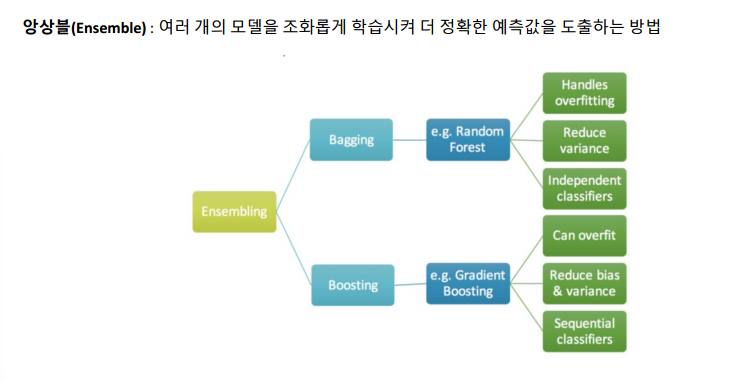

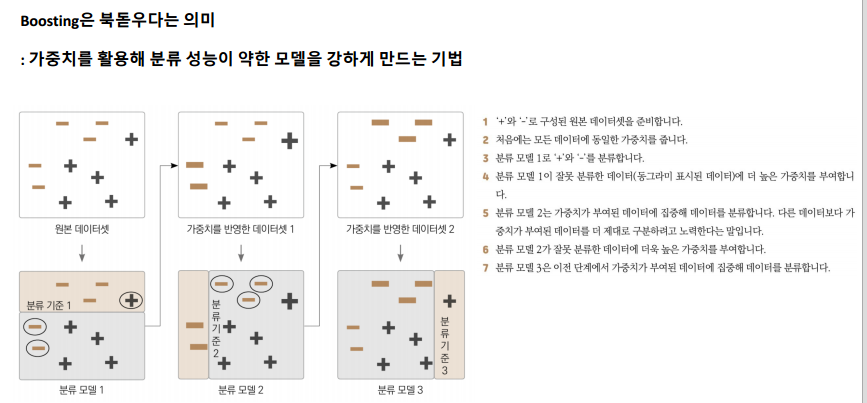

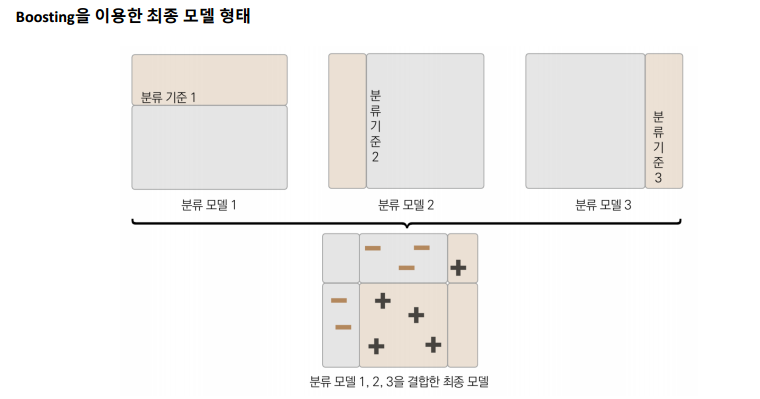

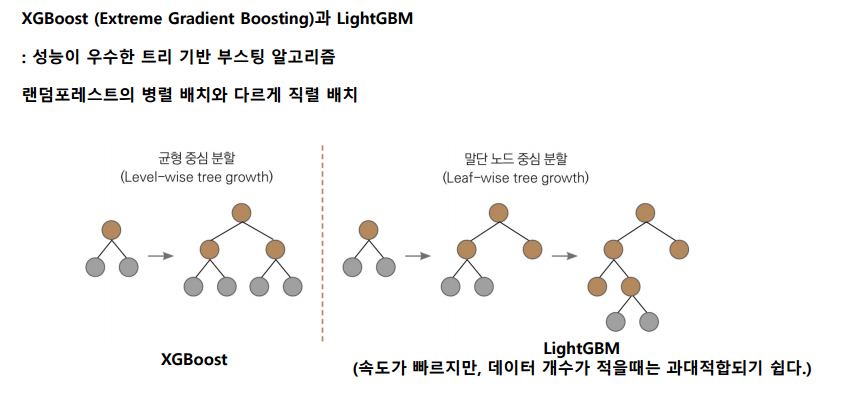

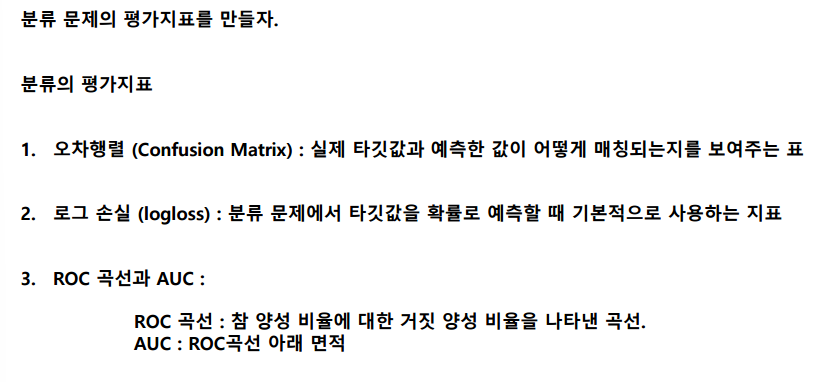

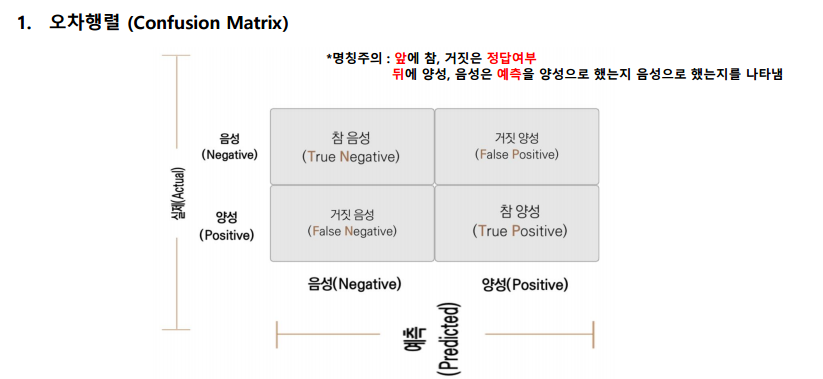

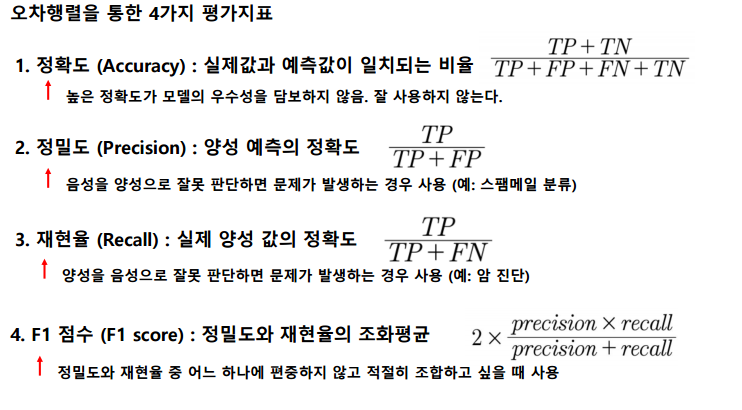

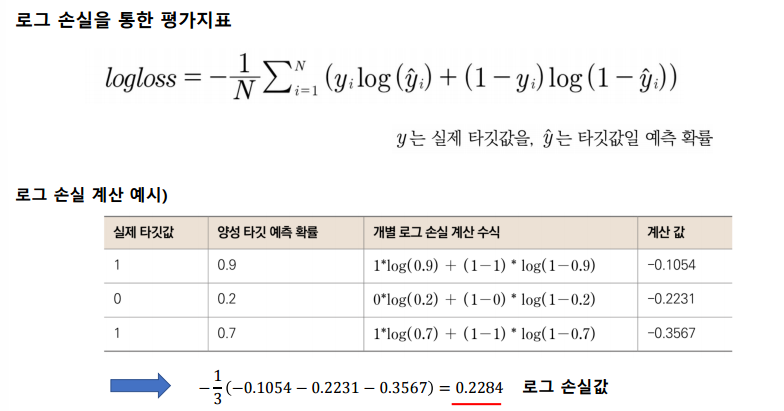

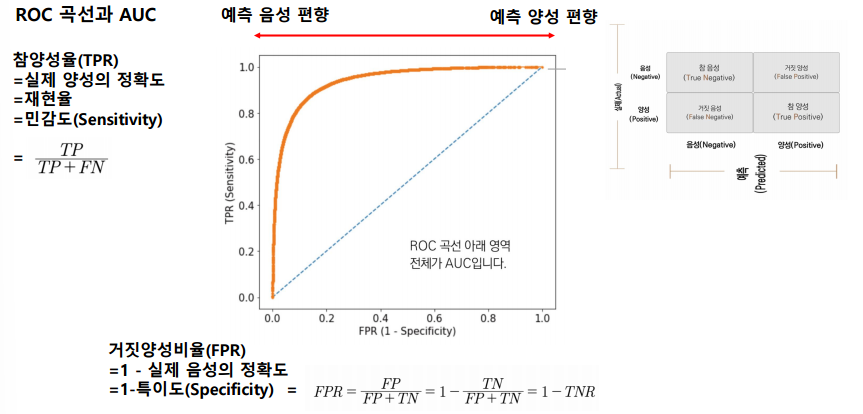

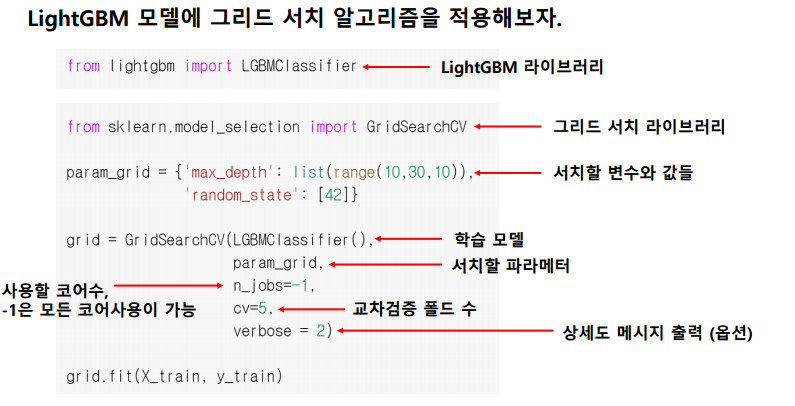

In [16]:
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : list(range(10, 30, 10)),
              'random_state' : [42]}

grid = GridSearchCV(LGBMClassifier(),
                   param_grid,
                   n_jobs = -1,
                   cv = 5,
                   verbose = 2)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


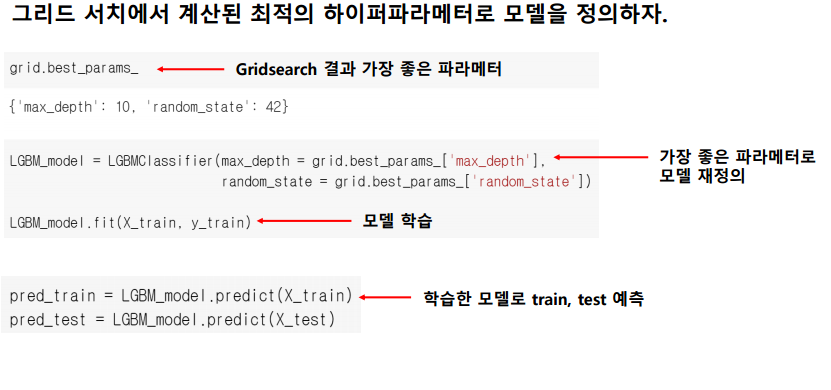

In [ ]:
grid.best_params_

In [ ]:
LGBM_model = LGBMClassifier(max_depth = grid.best_params_['max_depth'],
                           random_state = grid.best_params_['random_state'])

LGBM_model.fit(X_train, y_train)

In [ ]:
pred_train = LGBM_model.predict(X_train)
pred_test = LGBM_model.predict(X_test)

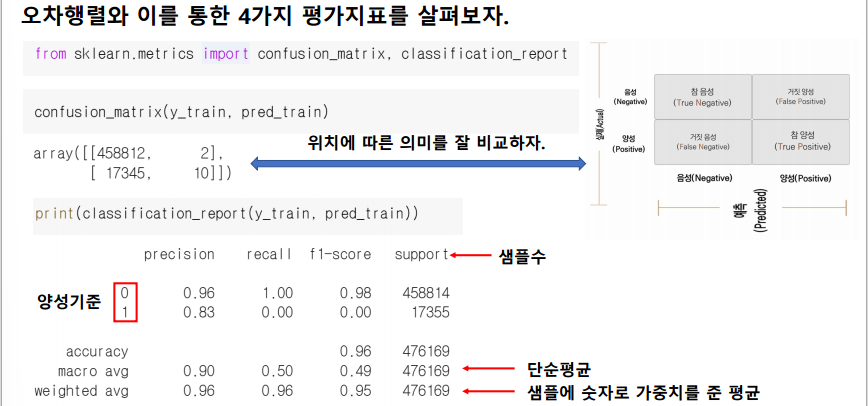f

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_train, pred_train)

In [ ]:
print(classification_report(y_train, pred_train))

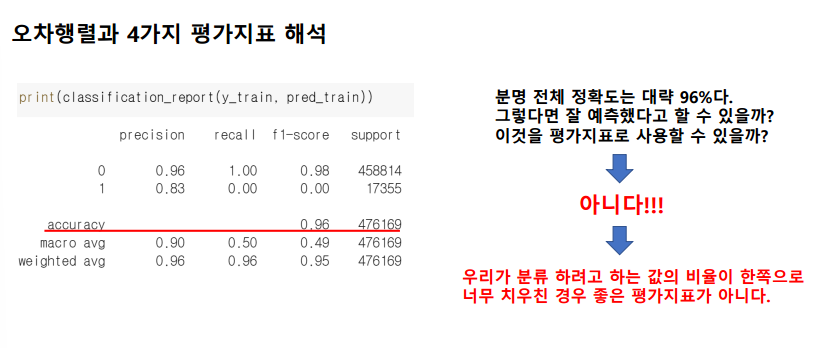

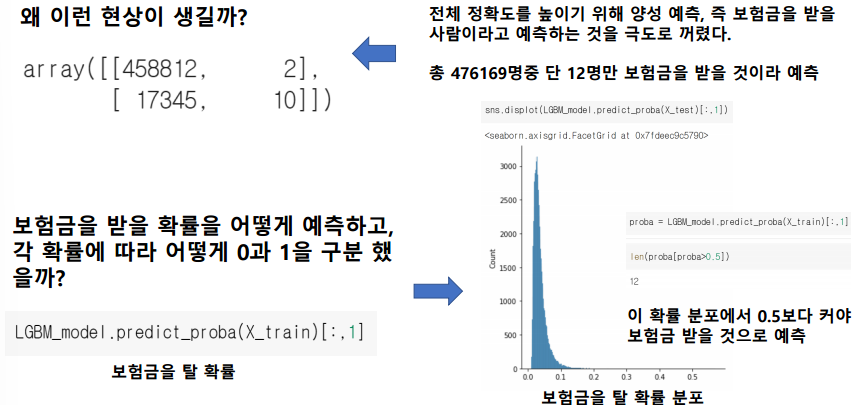

In [ ]:
LGBM_model.predict_proba(X_train)[:,1]

In [ ]:
sns.displot(LGBM_model.predict_proba(X_test)[:,1])

In [ ]:
proba = LGBM_model.predict_proba(X_train)[:, 1]

In [ ]:
len(proba[proba>0.5])

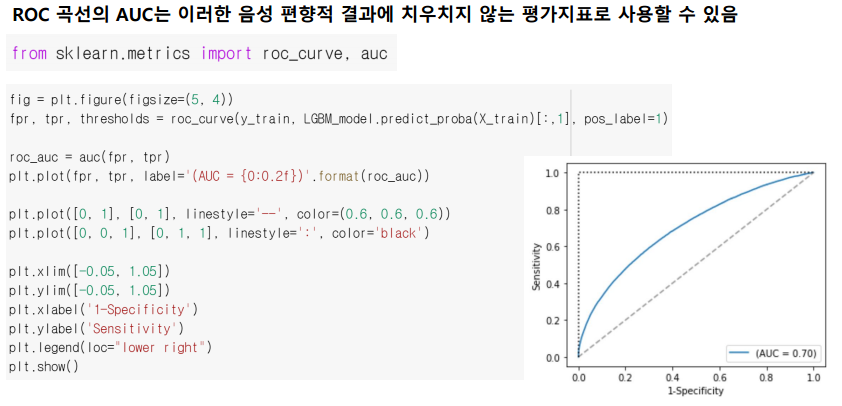

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fig = plt.figure(figsize = (5, 4))
fpr, tpr, threeholds = roc_curve(y_train, LGBM_model.predict_proba(X_train)[:,1], pos_label = 1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = '(AUC = {0:0.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], linestyle = '--', color = (0.6, 0.6, 0.6))
plt.plot([0, 0, 1], [0, 1, 1], linestyle = ':', color = 'black')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc = "lower right")
plt.show()

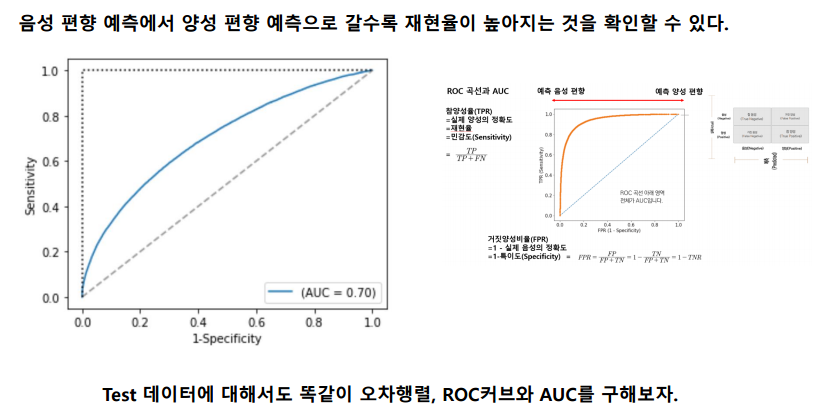

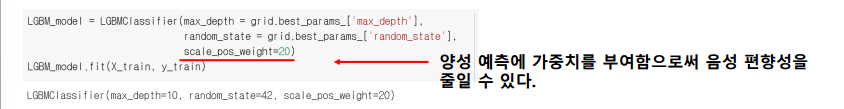

In [ ]:
LGBM_model = LGBMClassifier(max_depth = grid.best_params_['max_depth'],
                           random_state = grid.best_params_['random_state'],
                           scale_pos_weight = 20)

LGBM_model.fit(X_train, y_train)

In [ ]:
pred_train = LGBM_model.predict(X_train)
pred_test = LGBM_model.predict(X_test)

In [ ]:
confusion_matrix(y_train, pred_train)

In [ ]:
print(classification_report(y_train, pred_train))